In [25]:
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

Extract every 10th frame from each video

In [ ]:
# Set the path to the folder containing the subfolders
root_folder_path = 'D:/Studia/Jupyter/DAiSEE/DataSet/Train/'

# Loop through each subfolder in the root folder
for person_folder in os.listdir(root_folder_path):
    
    # Set the path to the subfolder containing the .avi files
    person_folder_path = os.path.join(root_folder_path, person_folder)
    
    # Loop through each subfolder in the person folder
    for video_folder in os.listdir(person_folder_path):
        
        # Set the path to the subfolder containing the .avi file
        video_folder_path = os.path.join(person_folder_path, video_folder)
        
        # Loop through each .avi file in the video folder
        for avi_file in os.listdir(video_folder_path):
            
            # Set the path to the .avi file
            avi_file_path = os.path.join(video_folder_path, avi_file)
            
            # Create a folder to store the frames from the video
            frames_folder_path = os.path.join(video_folder_path, 'frames')
            os.makedirs(frames_folder_path, exist_ok=True)
            
            # Open the video file
            video = cv2.VideoCapture(avi_file_path)
            
            # Loop through each tenth frame in the video
            frame_count = 0
            while True:
                success, frame = video.read()
                if not success:
                    break
                
                # Save the every tenth frame to the frames folder
                if frame_count % 10 == 0:
                    frame_path = os.path.join(frames_folder_path, f"{person_folder}_{video_folder}_{avi_file}_{frame_count}.jpg")
                    cv2.imwrite(frame_path, frame)
                
                frame_count += 1
            
            # Release the video object
            video.release()

Extract a numpy array from each frame with greyscale data and two resolutions and save the resulting dataframe in a pickle file

In [ ]:
df = pd.DataFrame(columns=['ClipID', 'frame'])
# set path to the folder with subfolders
top_folder = "D:/Studia/Jupyter/DAiSEE/DataSet/Test/"

# Create an empty dictionary to store the pixel representations
pixel_dict = {}
resolutions=[[20,11],[40,22]]

# Loop through each resolution:
for resolution in resolutions:
    
    # Loop through each person folder
    for person_folder in os.listdir(top_folder):

        # Create an empty list to store the pixel arrays for this person
        person_pixels = []

        # Loop through each jpg folder for this person
        for jpg_folder in os.listdir(os.path.join(top_folder, person_folder)):


            # Loop through each jpg file in the frames folder
            frames_folder = os.path.join(top_folder, person_folder, jpg_folder, 'frames')
            for jpg_file in os.listdir(frames_folder):
                # Load the image and convert it to a numpy array
                image_path = os.path.join(frames_folder, jpg_file)
                img_array=cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(resolution[0],resolution[1]))


                # Add the pixel array to the list for this person
                new_row = [str(jpg_folder)+'.avi',new_array]
                df.loc[len(df)] = new_row
    
    # Merge the dataframe with label data and save the result in a pickle file
    df2=pd.read_csv('AllLabels.csv')
    df_merged = pd.merge(df, df2, on='ClipID', how='left').dropna()
    df_merged=df_merged.dropna()
    df_merged.to_pickle(str(resolution[0])+str(resolution[1])+"data.pkl")

Train data of both resolutions with 3 different batch sizes

Resolution: [20, 11]
Running time: 427.73951840400696 seconds
----------------------------------------
Epoch 1/10
323/323 [==============================] - 77s 237ms/step - loss: 1.5888 - accuracy: 0.4945 - val_loss: 0.9233 - val_accuracy: 0.5217
Epoch 2/10
323/323 [==============================] - 76s 236ms/step - loss: 0.8919 - accuracy: 0.5373 - val_loss: 0.8996 - val_accuracy: 0.5372
Epoch 3/10
323/323 [==============================] - 76s 235ms/step - loss: 0.8807 - accuracy: 0.5485 - val_loss: 0.9130 - val_accuracy: 0.5426
Epoch 4/10
323/323 [==============================] - 76s 237ms/step - loss: 0.8871 - accuracy: 0.5431 - val_loss: 0.9111 - val_accuracy: 0.5348
Epoch 5/10
323/323 [==============================] - 76s 236ms/step - loss: 0.8845 - accuracy: 0.5504 - val_loss: 0.8945 - val_accuracy: 0.5348
Epoch 6/10
323/323 [==============================] - 76s 236ms/step - loss: 0.8720 - accuracy: 0.5541 - val_loss: 0.9060 - val_accuracy: 0.5503
Epoch 7/10
323/323 [=======

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


162/162 [==============================] - 75s 458ms/step - loss: 2.3472 - accuracy: 0.4773 - val_loss: 0.9381 - val_accuracy: 0.4752
Epoch 2/10
162/162 [==============================] - 74s 459ms/step - loss: 0.9118 - accuracy: 0.5049 - val_loss: 0.9476 - val_accuracy: 0.5101
Epoch 3/10
162/162 [==============================] - 74s 458ms/step - loss: 0.8918 - accuracy: 0.5233 - val_loss: 0.9059 - val_accuracy: 0.5271
Epoch 4/10
162/162 [==============================] - 74s 459ms/step - loss: 0.8820 - accuracy: 0.5396 - val_loss: 0.9007 - val_accuracy: 0.5402
Epoch 5/10
162/162 [==============================] - 75s 462ms/step - loss: 0.8786 - accuracy: 0.5462 - val_loss: 0.9022 - val_accuracy: 0.5379
Epoch 6/10
162/162 [==============================] - 74s 460ms/step - loss: 0.8811 - accuracy: 0.5504 - val_loss: 0.9090 - val_accuracy: 0.5093
Epoch 7/10
162/162 [==============================] - 74s 459ms/step - loss: 0.8827 - accuracy: 0.5421 - val_loss: 0.8970 - val_accuracy: 0.5

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


81/81 [==============================] - 74s 903ms/step - loss: 4.7482 - accuracy: 0.4687 - val_loss: 0.9343 - val_accuracy: 0.5116
Epoch 2/10
81/81 [==============================] - 73s 904ms/step - loss: 0.9085 - accuracy: 0.5212 - val_loss: 0.9285 - val_accuracy: 0.5263
Epoch 3/10
81/81 [==============================] - 73s 905ms/step - loss: 0.8753 - accuracy: 0.5421 - val_loss: 0.9149 - val_accuracy: 0.5356
Epoch 4/10
81/81 [==============================] - 73s 903ms/step - loss: 0.8568 - accuracy: 0.5562 - val_loss: 0.9099 - val_accuracy: 0.5271
Epoch 5/10
81/81 [==============================] - 73s 899ms/step - loss: 0.8498 - accuracy: 0.5621 - val_loss: 0.9138 - val_accuracy: 0.5286
Epoch 6/10
81/81 [==============================] - 73s 906ms/step - loss: 0.8376 - accuracy: 0.5694 - val_loss: 0.9041 - val_accuracy: 0.5519
Epoch 7/10
81/81 [==============================] - 73s 901ms/step - loss: 0.8181 - accuracy: 0.5905 - val_loss: 0.9094 - val_accuracy: 0.5542
Epoch 8/10

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


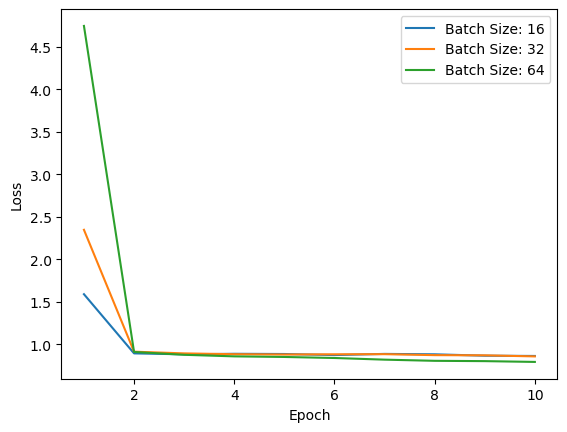

Batch size: 16
Running time: 763.1257164478302 seconds

Batch size: 32
Running time: 744.7618999481201 seconds

Batch size: 64
Running time: 732.031049489975 seconds

Resolution: [40, 22]
Running time: 422.330997467041 seconds
----------------------------------------
Epoch 1/10
323/323 [==============================] - 426s 1s/step - loss: 2.2919 - accuracy: 0.4753 - val_loss: 0.9637 - val_accuracy: 0.5302
Epoch 2/10
323/323 [==============================] - 426s 1s/step - loss: 0.9158 - accuracy: 0.5239 - val_loss: 0.9176 - val_accuracy: 0.5224
Epoch 3/10
323/323 [==============================] - 425s 1s/step - loss: 0.8941 - accuracy: 0.5200 - val_loss: 0.9123 - val_accuracy: 0.5224
Epoch 4/10
323/323 [==============================] - 364s 1s/step - loss: 0.8913 - accuracy: 0.5200 - val_loss: 0.9101 - val_accuracy: 0.5224
Epoch 5/10
323/323 [==============================] - 357s 1s/step - loss: 0.8907 - accuracy: 0.5200 - val_loss: 0.9094 - val_accuracy: 0.5224
Epoch 6/10
323/32

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


162/162 [==============================] - 355s 2s/step - loss: 4.5039 - accuracy: 0.4896 - val_loss: 0.9041 - val_accuracy: 0.5426
Epoch 2/10
162/162 [==============================] - 352s 2s/step - loss: 0.9094 - accuracy: 0.5346 - val_loss: 0.9460 - val_accuracy: 0.5457
Epoch 3/10
162/162 [==============================] - 353s 2s/step - loss: 0.8954 - accuracy: 0.5380 - val_loss: 0.9459 - val_accuracy: 0.4706
Epoch 4/10
162/162 [==============================] - 354s 2s/step - loss: 0.8860 - accuracy: 0.5590 - val_loss: 0.9051 - val_accuracy: 0.5364
Epoch 5/10
162/162 [==============================] - 352s 2s/step - loss: 0.8760 - accuracy: 0.5595 - val_loss: 0.9256 - val_accuracy: 0.5464
Epoch 6/10
162/162 [==============================] - 354s 2s/step - loss: 0.8628 - accuracy: 0.5642 - val_loss: 0.8937 - val_accuracy: 0.5426
Epoch 7/10
162/162 [==============================] - 352s 2s/step - loss: 0.8527 - accuracy: 0.5739 - val_loss: 0.8975 - val_accuracy: 0.5573
Epoch 8/10

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


81/81 [==============================] - 350s 4s/step - loss: 7.1515 - accuracy: 0.4784 - val_loss: 0.9387 - val_accuracy: 0.5255
Epoch 2/10
81/81 [==============================] - 347s 4s/step - loss: 0.9124 - accuracy: 0.5427 - val_loss: 0.9317 - val_accuracy: 0.5418
Epoch 3/10
81/81 [==============================] - 349s 4s/step - loss: 0.8884 - accuracy: 0.5522 - val_loss: 0.9195 - val_accuracy: 0.5364
Epoch 4/10
81/81 [==============================] - 348s 4s/step - loss: 0.8806 - accuracy: 0.5593 - val_loss: 0.9308 - val_accuracy: 0.5402
Epoch 5/10
81/81 [==============================] - 349s 4s/step - loss: 0.8810 - accuracy: 0.5539 - val_loss: 0.8807 - val_accuracy: 0.5805
Epoch 6/10
81/81 [==============================] - 348s 4s/step - loss: 0.8481 - accuracy: 0.5872 - val_loss: 0.9073 - val_accuracy: 0.5627
Epoch 7/10
81/81 [==============================] - 351s 4s/step - loss: 0.8591 - accuracy: 0.5824 - val_loss: 0.9695 - val_accuracy: 0.5201
Epoch 8/10
81/81 [======

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


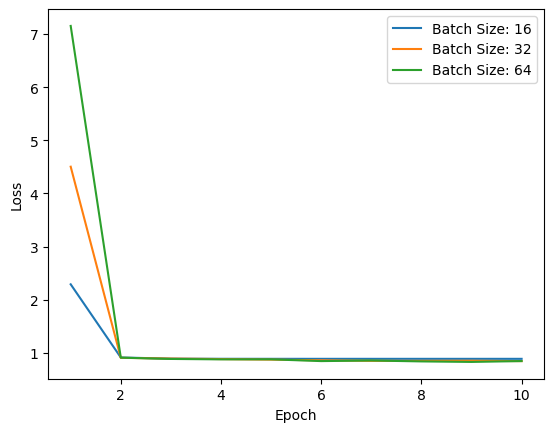

Batch size: 16
Running time: 3791.4223556518555 seconds

Batch size: 32
Running time: 3528.5669174194336 seconds

Batch size: 64
Running time: 3497.201152563095 seconds



In [27]:
Batch_sizes = [16,32,64]
resolutions = [[20,11],[40,22]]

# Iterate over image resolutions
for resolution in resolutions:
    start_time = time.time()  # Start measuring time

    # Load the dataframe containing the data
    df = pd.read_pickle(str(resolution[0]) + str(resolution[1]) + 'data.pkl')

    # Reshape the frames column to (num_samples, height, width, depth)
    frames = np.stack(df['frame'].values)
    frames = frames.reshape(-1, resolution[0], resolution[1], 1)

    # Create sequences for each video
    sequences = []
    for video_id in df['ClipID'].unique():
        video_frames = frames[df['ClipID'] == video_id]
        video_label = df.loc[df['ClipID'] == video_id, 'Engagement'].values[0]
        for i in range(len(video_frames) - 29):
            sequence = video_frames[i:i + 30]
            sequences.append((sequence, video_label))

    # Split the data into train and test sets
    X = np.array([s[0] for s in sequences])
    y = np.array([s[1] for s in sequences])

    # Convert y to its original format
    y = np.expand_dims(y, axis=1)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the running time
    end_time = time.time()
    running_time = end_time - start_time
    print("Resolution:", resolution)
    print("Running time:", running_time, "seconds")
    print("----------------------------------------")
    # Store running times and losses
    running_times = []
    losses = []

    for batch_size in Batch_sizes:
        start_time = time.time()

        # Define the 3D CNN model
        model = Sequential()
        model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(30, resolution[0], resolution[1], 1)))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(4, activation='softmax'))

        # Compile and train the model
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.2)

        # Store the running time
        running_time = time.time() - start_time
        running_times.append(running_time)

        # Store the losses per epoch
        losses.append(history.history['loss'])

        # Make predictions
        y_pred_prob = model.predict(X_test)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Flatten y_test and y_pred to match the expected format for classification_report
        y_test_flattened = y_test.flatten()
        y_pred_flattened = y_pred.flatten()

        # Print batch size and resolution
        print('Batch size:', batch_size)
        print('Resolution:', resolution[0], 'x', resolution[1])

        # Print classification report
        report = classification_report(y_test_flattened, y_pred_flattened)
        print(report)

        # Print confusion matrix
        cm = confusion_matrix(y_test_flattened, y_pred_flattened)
        print("Confusion Matrix:")
        print(cm)

    # Plot the loss per training epoch
    for i, loss in enumerate(losses):
        plt.plot(range(1, len(loss) + 1), loss, label='Batch Size: ' + str(Batch_sizes[i]))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Print the running times
    for i, running_time in enumerate(running_times):
        print('Batch size:', Batch_sizes[i])
        print('Running time:', running_time, 'seconds')
        print()

Train the higher resolition 

Resolution: [40, 22]
Running time: 418.91709184646606 seconds
----------------------------------------
Epoch 1/10
41/41 [==============================] - 419s 10s/step - loss: 16.4093 - accuracy: 0.4647 - val_loss: 0.9645 - val_accuracy: 0.5015
Epoch 2/10
41/41 [==============================] - 420s 10s/step - loss: 0.9200 - accuracy: 0.5295 - val_loss: 0.9294 - val_accuracy: 0.5433
Epoch 3/10
41/41 [==============================] - 420s 10s/step - loss: 0.9113 - accuracy: 0.5375 - val_loss: 0.9332 - val_accuracy: 0.5147
Epoch 4/10
41/41 [==============================] - 420s 10s/step - loss: 0.8849 - accuracy: 0.5582 - val_loss: 0.9011 - val_accuracy: 0.5286
Epoch 5/10
41/41 [==============================] - 420s 10s/step - loss: 0.8619 - accuracy: 0.5624 - val_loss: 0.9246 - val_accuracy: 0.5302
Epoch 6/10
41/41 [==============================] - 400s 10s/step - loss: 0.8600 - accuracy: 0.5679 - val_loss: 0.9144 - val_accuracy: 0.5488
Epoch 7/10
41/41 [==========================

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


21/21 [==============================] - 421s 20s/step - loss: 29.2080 - accuracy: 0.4341 - val_loss: 0.9397 - val_accuracy: 0.5232
Epoch 2/10
21/21 [==============================] - 421s 20s/step - loss: 0.9043 - accuracy: 0.5198 - val_loss: 0.9218 - val_accuracy: 0.5240
Epoch 3/10
21/21 [==============================] - 409s 19s/step - loss: 0.8902 - accuracy: 0.5489 - val_loss: 0.9024 - val_accuracy: 0.5596
Epoch 4/10
21/21 [==============================] - 384s 18s/step - loss: 0.8618 - accuracy: 0.5673 - val_loss: 0.9143 - val_accuracy: 0.5310
Epoch 5/10
21/21 [==============================] - 418s 20s/step - loss: 0.8518 - accuracy: 0.5799 - val_loss: 0.9112 - val_accuracy: 0.5550
Epoch 6/10
21/21 [==============================] - 420s 20s/step - loss: 0.8608 - accuracy: 0.5646 - val_loss: 0.8987 - val_accuracy: 0.5441
Epoch 7/10
21/21 [==============================] - 421s 20s/step - loss: 0.8556 - accuracy: 0.5781 - val_loss: 0.8933 - val_accuracy: 0.5580
Epoch 8/10
21/21

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


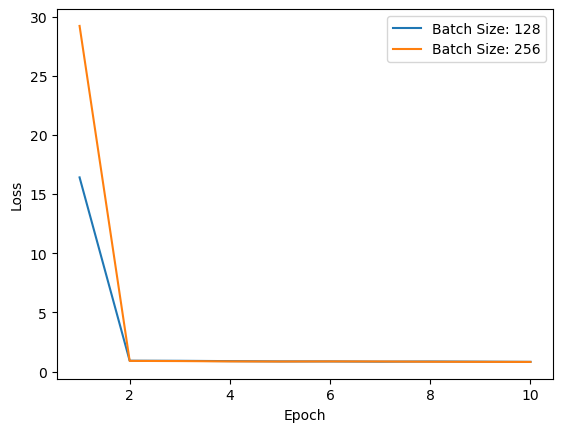

Batch size: 128
Running time: 4169.198256254196 seconds

Batch size: 256
Running time: 4155.616640090942 seconds



In [26]:
Batch_sizes = [128,256]
resolutions = [[40, 22]]

# Iterate over image resolutions
for resolution in resolutions:
    start_time = time.time()  # Start measuring time

    # Load the dataframe containing the data
    df = pd.read_pickle(str(resolution[0]) + str(resolution[1]) + 'data.pkl')

    # Reshape the frames column to (num_samples, height, width, depth)
    frames = np.stack(df['frame'].values)
    frames = frames.reshape(-1, resolution[0], resolution[1], 1)

    # Create sequences for each video
    sequences = []
    for video_id in df['ClipID'].unique():
        video_frames = frames[df['ClipID'] == video_id]
        video_label = df.loc[df['ClipID'] == video_id, 'Engagement'].values[0]
        for i in range(len(video_frames) - 29):
            sequence = video_frames[i:i + 30]
            sequences.append((sequence, video_label))

    # Split the data into train and test sets
    X = np.array([s[0] for s in sequences])
    y = np.array([s[1] for s in sequences])

    # Convert y to its original format
    y = np.expand_dims(y, axis=1)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the running time
    end_time = time.time()
    running_time = end_time - start_time
    print("Resolution:", resolution)
    print("Running time:", running_time, "seconds")
    print("----------------------------------------")
    # Store running times and losses
    running_times = []
    losses = []

    for batch_size in Batch_sizes:
        start_time = time.time()

        # Define the 3D CNN model
        model = Sequential()
        model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(30, resolution[0], resolution[1], 1)))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
        model.add(MaxPooling3D(pool_size=(2, 2, 2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(4, activation='softmax'))

        # Compile and train the model
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.2)

        # Store the running time
        running_time = time.time() - start_time
        running_times.append(running_time)

        # Store the losses per epoch
        losses.append(history.history['loss'])

        # Make predictions
        y_pred_prob = model.predict(X_test)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Flatten y_test and y_pred to match the expected format for classification_report
        y_test_flattened = y_test.flatten()
        y_pred_flattened = y_pred.flatten()

        # Print batch size and resolution
        print('Batch size:', batch_size)
        print('Resolution:', resolution[0], 'x', resolution[1])

        # Print classification report
        report = classification_report(y_test_flattened, y_pred_flattened)
        print(report)

        # Print confusion matrix
        cm = confusion_matrix(y_test_flattened, y_pred_flattened)
        print("Confusion Matrix:")
        print(cm)

    # Plot the loss per training epoch
    for i, loss in enumerate(losses):
        plt.plot(range(1, len(loss) + 1), loss, label='Batch Size: ' + str(Batch_sizes[i]))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Print the running times
    for i, running_time in enumerate(running_times):
        print('Batch size:', Batch_sizes[i])
        print('Running time:', running_time, 'seconds')
        print()